# STEP 3: Training of the fold 1

In this section we are going to obtain a model for the fold 1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation

## Data Loading 

In [2]:
df = pd.read_csv('datasets/train_fold1.csv', index_col='MachineIdentifier')

## Splitting label information

In [6]:
df_y = df['HasDetections']
df.drop(labels=['HasDetections'], axis=1, inplace=True)

## Categorical to Numerical 

In [7]:
columns_categorical = df.select_dtypes(include=['object']).columns

In [8]:
total = 0
for c in columns_categorical:
    values = df[c].nunique()
    total += values
    print(str(c) + ': ' + str(values))
print('Total new vars: ' + str(total))

ProductName: 2
EngineVersion: 53
AppVersion: 87
AvSigVersion: 4798
Platform: 3
Processor: 2
OsVer: 7
OsPlatformSubRelease: 9
OsBuildLab: 282
SkuEdition: 7
SmartScreen: 10
Census_MDC2FormFactor: 10
Census_DeviceFamily: 1
Census_PrimaryDiskTypeName: 4
Census_ChassisTypeName: 27
Census_PowerPlatformRoleName: 9
Census_OSVersion: 250
Census_OSArchitecture: 2
Census_OSBranch: 13
Census_OSEdition: 14
Census_OSSkuName: 13
Census_OSInstallTypeName: 9
Census_OSWUAutoUpdateOptionsName: 5
Census_GenuineStateName: 4
Census_ActivationChannel: 5
Census_FlightRing: 7
Total new vars: 5633


There are some of the categorical values that have a lot of values .... 

In [9]:
df_num=pd.get_dummies(data=df,columns=columns_categorical)

# Classification problem

In [36]:
import sys
sys.path.append('../../GitRepos/dsbase/src/main/')

from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper

## Ada Boosting 

In [46]:
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModelParamsToMap
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModel

In [47]:
params = AdaBoostClassificationDSBaseModelParamsToMap(100,1.0)
abc = ModelDSBaseWrapper('AB',df_num.values,df_y.values,[30,65,100],0.3,AdaBoostClassificationDSBaseModel,params,splitter=train_test_split)

X size:(201647, 431)
y size:(201647,)
initiating model AB0. AdaBoostClassification
initiating model AB1. AdaBoostClassification
initiating model AB2. AdaBoostClassification


In [48]:
abc.train()

training model AB0. AdaBoostClassification
training model AB1. AdaBoostClassification
training model AB2. AdaBoostClassification


In [49]:
lcabc = abc.getLearningCurves()

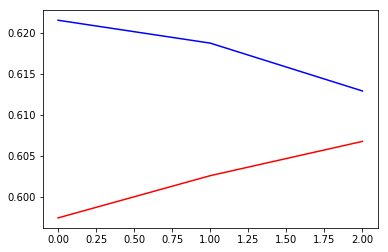

In [50]:
plt.plot(lcabc[0,:],'b',lcabc[1,:],'r')

In [51]:
abc.getScore()

0.606744359037937

# End of modeling! 